# Causal graph

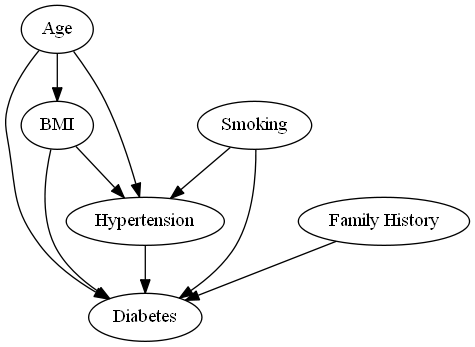

In [96]:
import pydot
from IPython.display import Image, display
import statsmodels.api as sm


# Create a directed graph
dag = pydot.Dot(graph_type="digraph")

# Add nodes
nodes = ['Age', 'BMI', 'Hypertension', 'Smoking', 'Family History', 'Diabetes']
for node in nodes:
    dag.add_node(pydot.Node(node))

# Add edges to represent causal relationships
edges = [('Age', 'BMI'),
         ('Age', 'Hypertension'),
         ('Age', 'Diabetes'),
         ('BMI', 'Hypertension'),
         ('BMI', 'Diabetes'),
         ('Hypertension', 'Diabetes'),
         ('Family History', 'Diabetes'),
         ('Smoking', 'Hypertension'),
         ('Smoking', 'Diabetes')]

for edge in edges:
    dag.add_edge(pydot.Edge(edge[0], edge[1]))

# Convert graph to PNG image
png_str = dag.create_png()

# Display the image in the notebook
dag.write_png('diabetes_dag_pydot.png')

display(Image(png_str))


In [97]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/Alexander/Documents/GitHub/berend-66-TDSOR_midterm_project_ABE/data/diabetes.csv'
df = pd.read_csv(file_path)
df.head()

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes
0,1_2_1,0,24,2,2,0,125,2019,66,0,0,0,0
1,2_1_1,0,76,2,1,0,190,2727,70,1,0,0,0
2,3_1_2,0,36,2,2,0,225,3862,64,0,0,0,1
3,5_1_1,0,35,1,2,0,240,3995,65,0,0,0,1
4,10_1_5,0,20,2,2,0,103,1883,62,0,0,0,1


In [98]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/Alexander/Documents/GitHub/berend-66-TDSOR_midterm_project_ABE/data/diabetes.csv'
df = pd.read_csv(file_path)

# Modify the 'smoker' variable: set to 1 if the value is 2, otherwise 0
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 2 else 0)

# Modify the 'sex' variable: set to 1 for male (assuming 1 is male), otherwise 0
df['sex'] = df['sex'].apply(lambda x: 1 if x == 1 else 0)

# Check the changes
print(df[['smoker', 'sex']].head())

   smoker  sex
0       1    0
1       1    1
2       1    0
3       0    0
4       1    0


In [99]:
# hypertension family_history_diabetes smoker sex

# Basic Regression

In [100]:
# Define the dependent and independent variables
X = df[['age', 'hypertension', 'smoker', 'family_history_diabetes', 'bmi']]  # Independent variables
Y = df['diabetes']  # Dependent variable

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     1031.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:54:14   Log-Likelihood:                -5584.2
No. Observations:               32499   AIC:                         1.118e+04
Df Residuals:                   32493   BIC:                         1.123e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [101]:
plt.style.use('default')

# Z test for all vars

In [102]:
import scipy.stats as stats
import numpy as np

# List of variables to test
variables = ['hypertension', 'family_history_diabetes', 'smoker', 'sex']

# Create the header for the markdown table
print("| Variable               | Proportion (1) | Proportion (0) | Difference (1 - 0) | Z-statistic | P-value | Significance |")
print("|------------------------|----------------|----------------|---------------------|-------------|---------|--------------|")

# Perform hypothesis testing for each variable
for var in variables:
    group1 = df[df[var] == 1]['diabetes']  # Group where the X variable (e.g., hypertension) is 1
    group2 = df[df[var] == 0]['diabetes']  # Group where the X variable is 0
    
    # Calculate the proportions for both groups
    proportion_group1 = group1.mean()
    proportion_group2 = group2.mean()
    
    # Calculate the difference in proportions
    proportion_difference = proportion_group1 - proportion_group2
    
    # Calculate the number of observations in each group
    n1 = len(group1)
    n2 = len(group2)
    
    # Calculate the pooled proportion
    pooled_proportion = (group1.sum() + group2.sum()) / (n1 + n2)
    
    # Calculate the standard error for the difference in proportions
    standard_error = np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1/n1 + 1/n2))
    
    # Calculate the Z-statistic
    z_stat = proportion_difference / standard_error
    
    # Calculate the two-tailed p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    # Determine significance based on p-value
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    
    # Print the row for this variable
    print(f"| {var: <23} | {proportion_group1:.4f}       | {proportion_group2:.4f}       | {proportion_difference:.4f}             | {z_stat:.4f}      | {p_value:.4f}  | {significance}  |")


| Variable               | Proportion (1) | Proportion (0) | Difference (1 - 0) | Z-statistic | P-value | Significance |
|------------------------|----------------|----------------|---------------------|-------------|---------|--------------|
| hypertension            | 0.2279       | 0.0404       | 0.1875             | 52.3351      | 0.0000  | Significant  |
| family_history_diabetes | 0.2059       | 0.0530       | 0.1529             | 42.6347      | 0.0000  | Significant  |
| smoker                  | 0.0906       | 0.1306       | -0.0400             | -11.4841      | 0.0000  | Significant  |
| sex                     | 0.1132       | 0.1021       | 0.0111             | 3.2203      | 0.0013  | Significant  |


In [103]:
import scipy.stats as stats
import numpy as np

# List of variables to test
variables = ['hypertension', 'family_history_diabetes', 'smoker', 'sex']

# Start the LaTeX table
latex_table = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{|l|c|c|c|c|c|}
\\hline
Variable & Proportion (1) & Proportion (0) & Difference (1 - 0) & Z-statistic & P-value \\\\ 
\\hline
"""

# Perform hypothesis testing for each variable
for var in variables:
    group1 = df[df[var] == 1]['diabetes']  # Group where the X variable (e.g., hypertension) is 1
    group2 = df[df[var] == 0]['diabetes']  # Group where the X variable is 0
    
    # Calculate the proportions for both groups
    proportion_group1 = group1.mean()
    proportion_group2 = group2.mean()
    
    # Calculate the difference in proportions
    proportion_difference = proportion_group1 - proportion_group2
    
    # Calculate the number of observations in each group
    n1 = len(group1)
    n2 = len(group2)
    
    # Calculate the pooled proportion
    pooled_proportion = (group1.sum() + group2.sum()) / (n1 + n2)
    
    # Calculate the standard error for the difference in proportions
    standard_error = np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1/n1 + 1/n2))
    
    # Calculate the Z-statistic
    z_stat = proportion_difference / standard_error
    
    # Calculate the two-tailed p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    # Determine significance based on p-value and add stars for LaTeX format
    significance = "***" if p_value < 0.01 else "**" if p_value < 0.05 else "*" if p_value < 0.1 else ""
    
    # Add the row to the LaTeX table
    latex_table += f"{var} & {proportion_group1:.4f} & {proportion_group2:.4f} & {proportion_difference:.4f} & {z_stat:.4f} & {p_value:.4f}{significance} \\\\ \n"
    
# Close the LaTeX table
latex_table += """
\\hline
\\end{tabular}
\\caption{Hypothesis Testing Results for Health Variables and Diabetes}
\\end{table}
"""

# Print the LaTeX table
print(latex_table)



\begin{table}[ht]
\centering
\begin{tabular}{|l|c|c|c|c|c|}
\hline
Variable & Proportion (1) & Proportion (0) & Difference (1 - 0) & Z-statistic & P-value \\ 
\hline
hypertension & 0.2279 & 0.0404 & 0.1875 & 52.3351 & 0.0000*** \\ 
family_history_diabetes & 0.2059 & 0.0530 & 0.1529 & 42.6347 & 0.0000*** \\ 
smoker & 0.0906 & 0.1306 & -0.0400 & -11.4841 & 0.0000*** \\ 
sex & 0.1132 & 0.1021 & 0.0111 & 3.2203 & 0.0013*** \\ 

\hline
\end{tabular}
\caption{Hypothesis Testing Results for Health Variables and Diabetes}
\end{table}



In [104]:
plt.style.use('seaborn')

# SMOKER AND SEX - MEAN TEST

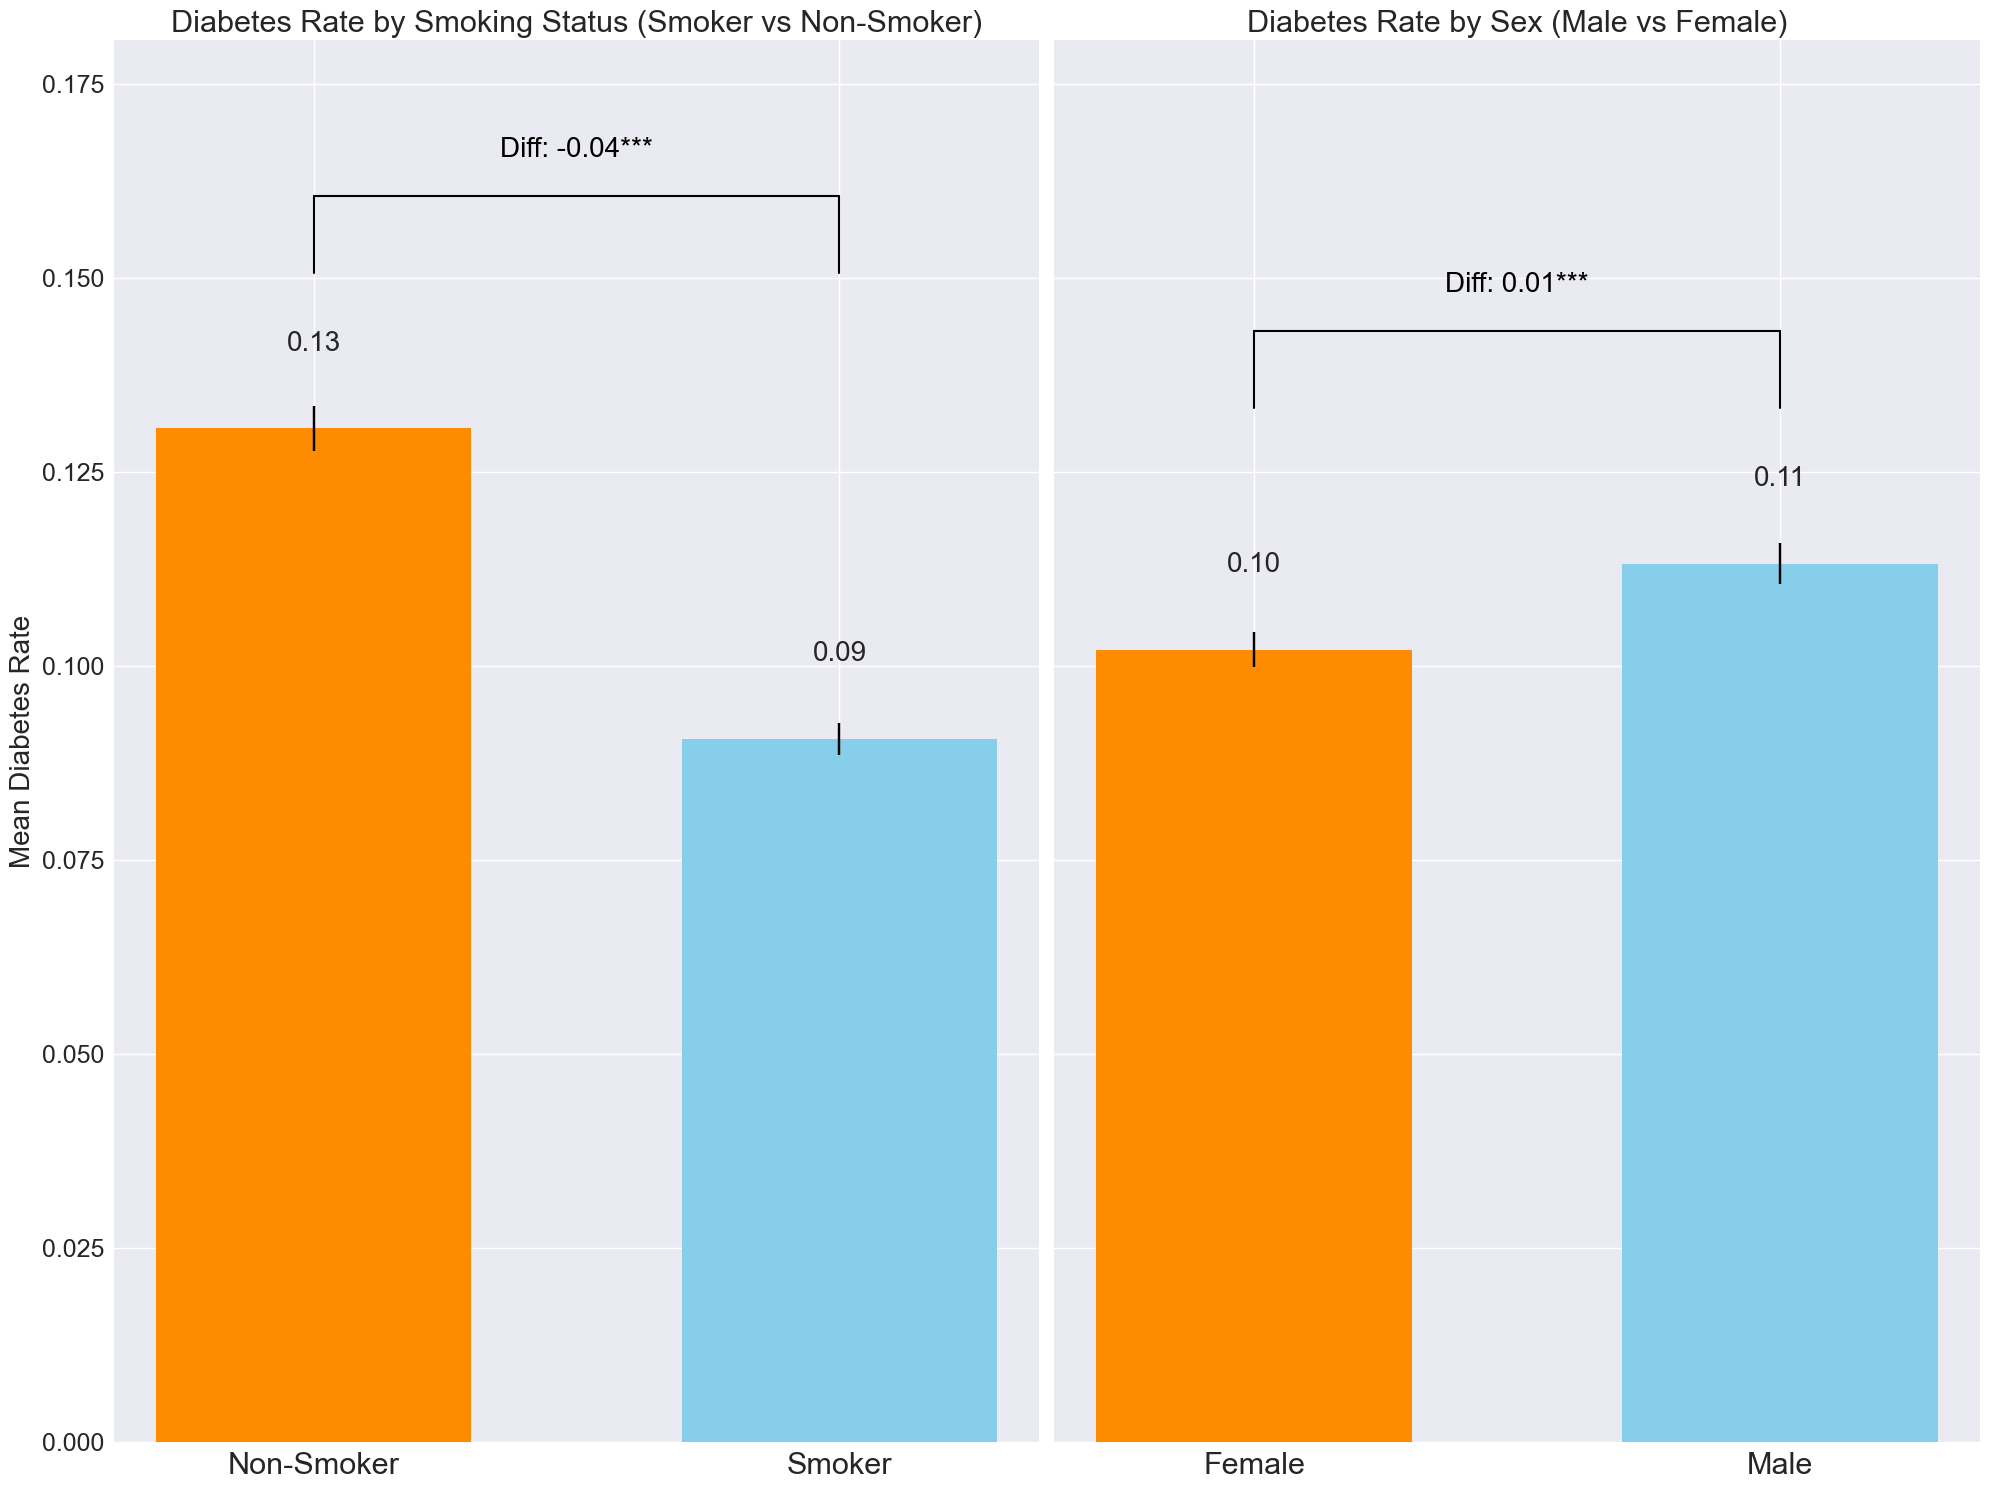

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# List of variables to test
variables = ['smoker', 'sex']

# Set up figure size and positions
fig, axs = plt.subplots(1, len(variables), figsize=(20, 15))

# Find the global max to use the same Y-axis limit for all subplots
global_max = 0
for var in variables:
    group1 = df[df[var] == 1]['diabetes']  # Group where the X variable is 1
    group2 = df[df[var] == 0]['diabetes']  # Group where the X variable is 0
    
    # Calculate means
    mean_group1 = group1.mean()
    mean_group2 = group2.mean()
    
    # Update global max based on the highest mean value
    global_max = max(global_max, mean_group1, mean_group2)

# Add some padding to the Y-axis limit
y_max = global_max + 0.05

# Perform hypothesis testing and plot for each variable
for i, var in enumerate(variables):
    group1 = df[df[var] == 1]['diabetes']  # Group where the X variable is 1
    group2 = df[df[var] == 0]['diabetes']  # Group where the X variable is 0
    
    # Calculate means and standard errors
    mean_group1 = group1.mean()
    mean_group2 = group2.mean()
    std_err_group1 = stats.sem(group1)
    std_err_group2 = stats.sem(group2)
    
    # Calculate the number of observations in each group
    n1 = len(group1)
    n2 = len(group2)

    # Calculate the pooled proportion
    pooled_proportion = (group1.sum() + group2.sum()) / (n1 + n2)

    # Calculate the standard error for the difference in proportions
    standard_error = np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1/n1 + 1/n2))

    # Calculate the Z-statistic
    mean_difference = mean_group1 - mean_group2
    z_stat = mean_difference / standard_error

    # Calculate the two-tailed p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

    # Plot bars with error bars
    axs[i].bar(0, mean_group2, yerr=std_err_group2, color='darkorange', width=0.6, label=f'{var} = 0', align='center')
    axs[i].bar(1, mean_group1, yerr=std_err_group1, color='skyblue', width=0.6, label=f'{var} = 1', align='center')
    
    # Set x-ticks and labels
    axs[i].set_xticks([0, 1])

    # Set custom titles based on the variable
    if var == 'sex':
        axs[i].set_title('Diabetes Rate by Sex (Male vs Female)', fontsize=22)
        axs[i].set_xticklabels(['Female', 'Male'], fontsize=22)
    elif var == 'smoker':
        axs[i].set_title('Diabetes Rate by Smoking Status (Smoker vs Non-Smoker)', fontsize=22)
        axs[i].set_xticklabels(['Non-Smoker', 'Smoker'], fontsize=22)
    
    # Only set the Y-axis label for the first subplot
    if i == 0:
        axs[i].set_ylabel('Mean Diabetes Rate', fontsize=20)
    else:
        axs[i].set_yticklabels([])  # Remove Y-axis tick labels for the second subplot
    
    # Set the same Y-axis limit for all subplots
    axs[i].set_ylim(0, y_max)
    
    # Increase Y-axis tick label size
    axs[i].tick_params(axis='y', labelsize=18)  # Increasing the Y-axis tick label size
    
    # Add significance marker if p-value is significant
    if p_value < 0.01:
        # Position the asterisk slightly above the highest bar
        max_bar = max(mean_group1, mean_group2)
        bar_height = max_bar + 0.03
        
        # Add the horizontal line with vertical bars
        axs[i].plot([0, 1], [bar_height, bar_height], color='black', lw=1.5)  # Horizontal line between bars
        axs[i].plot([0, 0], [bar_height - 0.01, bar_height], color='black', lw=1.5)  # Left vertical bar
        axs[i].plot([1, 1], [bar_height - 0.01, bar_height], color='black', lw=1.5)  # Right vertical bar
        
        # Add the asterisk and the mean difference
        axs[i].text(0.5, bar_height + 0.005, f'Diff: {mean_difference:.2f}***', ha='center', fontsize=20, color='black')
    
    # Annotate the means
    axs[i].text(0, mean_group2 + 0.01, f'{mean_group2:.2f}', ha='center', fontsize=20)
    axs[i].text(1, mean_group1 + 0.01, f'{mean_group1:.2f}', ha='center', fontsize=20)

# Adjust layout to prevent text overlap
plt.tight_layout()

# Save the figure
plt.savefig('C:/Users/Alexander/Documents/GitHub/berend-66-TDSOR_midterm_project_ABE/output/smoker_sex_mean_test.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Hypertension and Family History - MEAN TEST

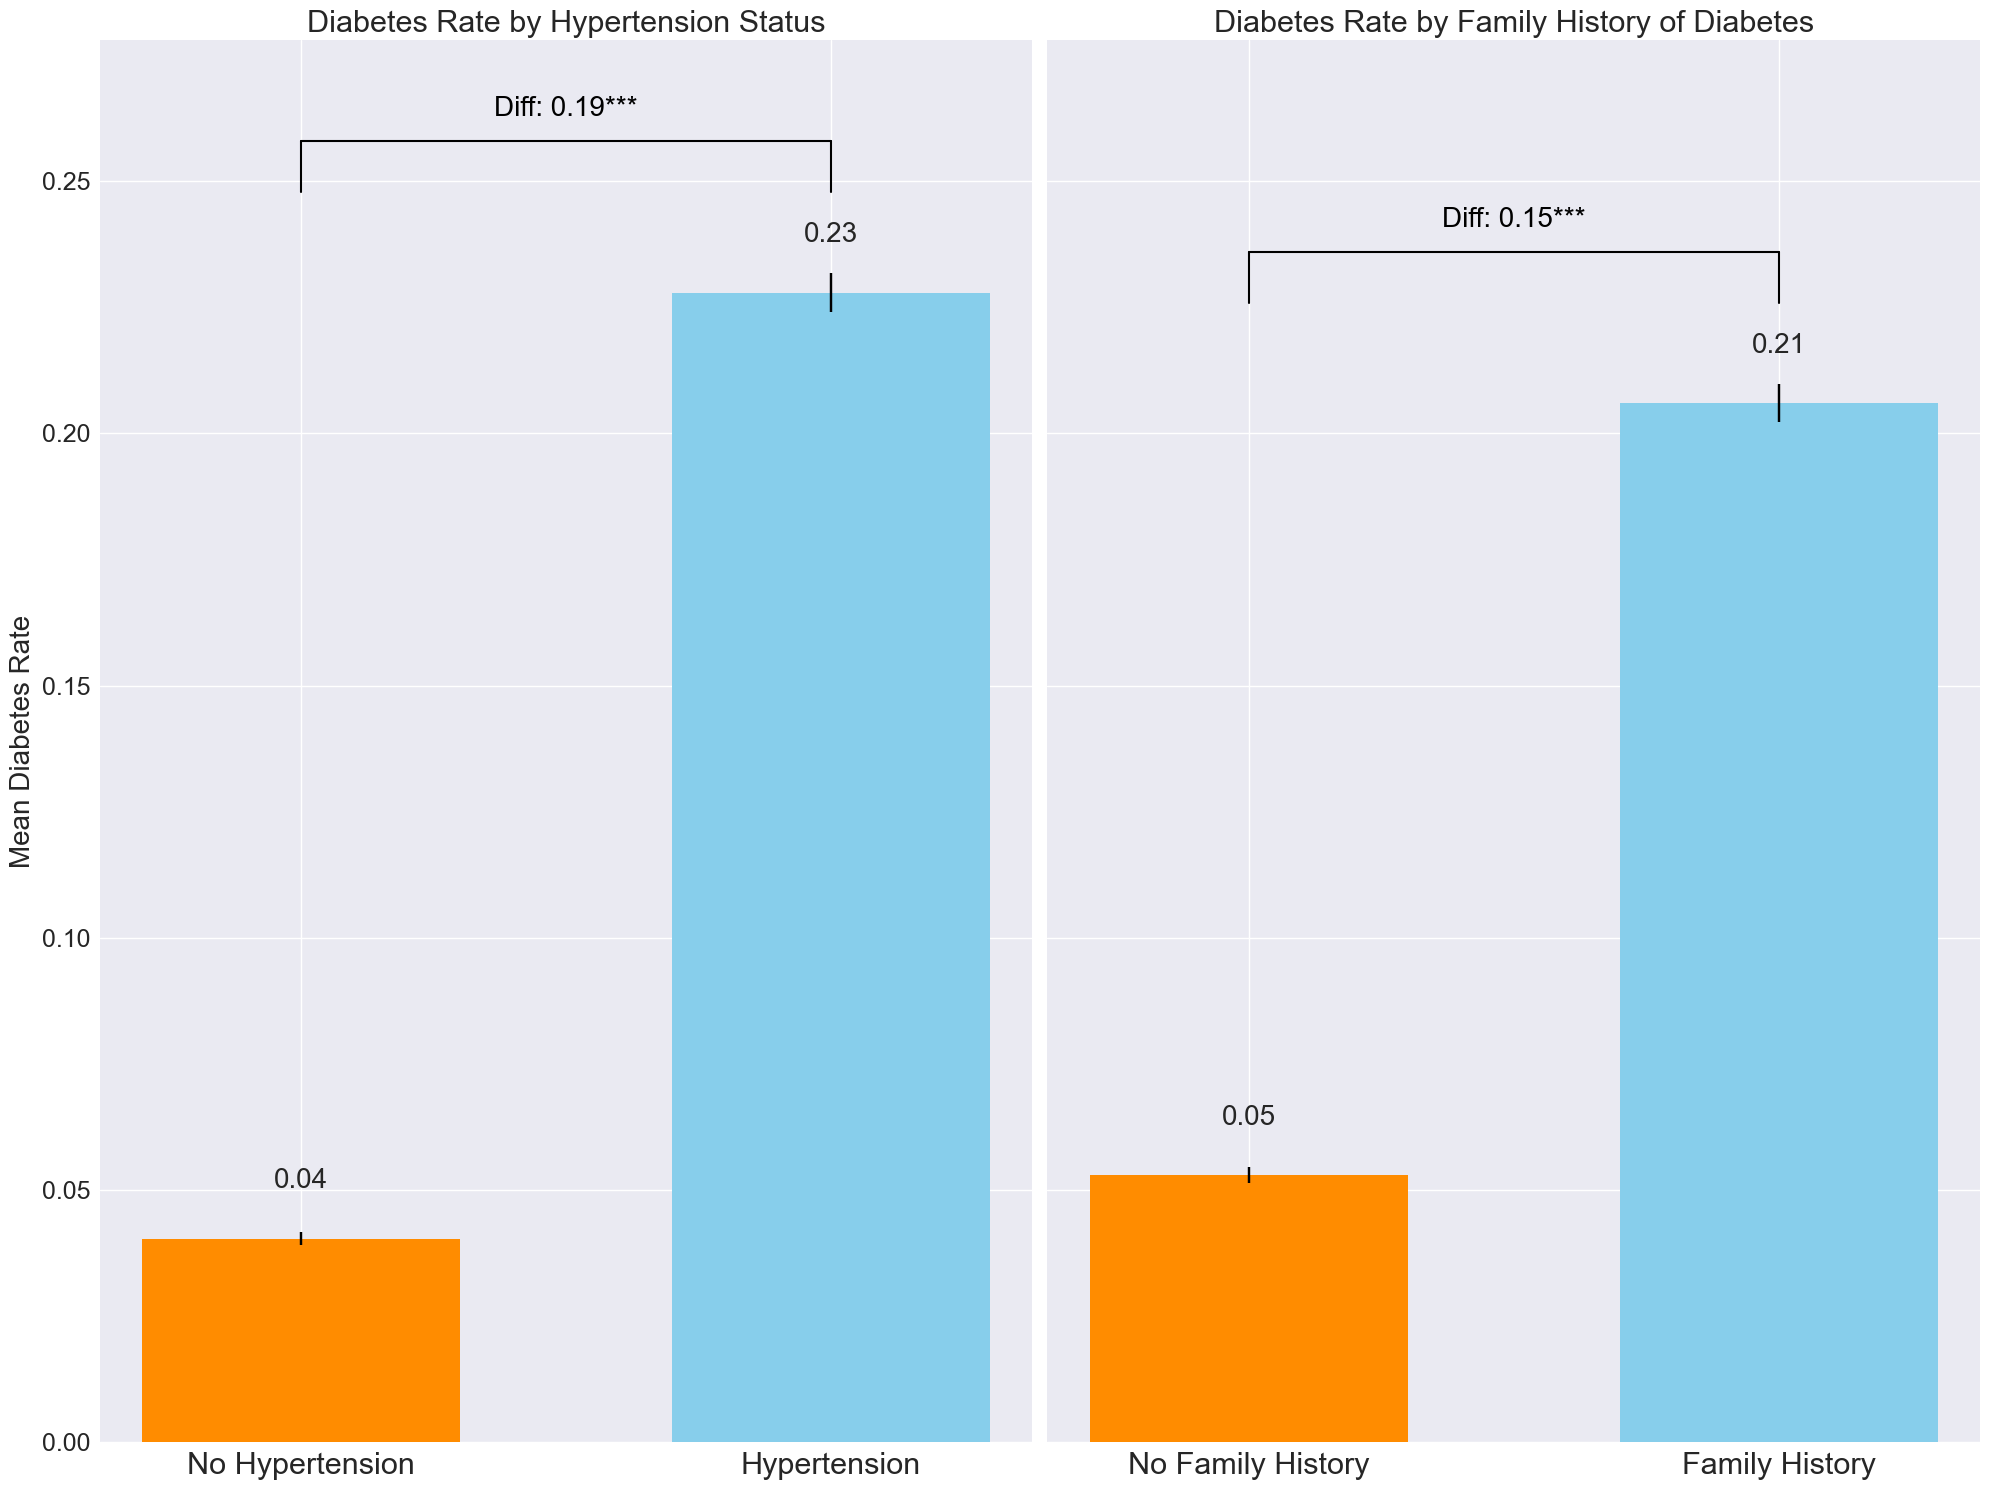

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# List of variables to test
variables = ['hypertension', 'family_history_diabetes']

# Set up figure size and positions
fig, axs = plt.subplots(1, len(variables), figsize=(20, 15))

# Find the global max to use the same Y-axis limit for all subplots
global_max = 0
for var in variables:
    group1 = df[df[var] == 1]['diabetes']  # Group where the X variable is 1
    group2 = df[df[var] == 0]['diabetes']  # Group where the X variable is 0
    
    # Calculate means
    mean_group1 = group1.mean()
    mean_group2 = group2.mean()
    
    # Update global max based on the highest mean value
    global_max = max(global_max, mean_group1, mean_group2)

# Add some padding to the Y-axis limit
y_max = global_max + 0.05

# Perform hypothesis testing and plot for each variable
for i, var in enumerate(variables):
    group1 = df[df[var] == 1]['diabetes']  # Group where the X variable is 1
    group2 = df[df[var] == 0]['diabetes']  # Group where the X variable is 0
    
    # Calculate means and standard errors
    mean_group1 = group1.mean()
    mean_group2 = group2.mean()
    std_err_group1 = stats.sem(group1)
    std_err_group2 = stats.sem(group2)
    
    # Calculate the number of observations in each group
    n1 = len(group1)
    n2 = len(group2)

    # Calculate the pooled proportion
    pooled_proportion = (group1.sum() + group2.sum()) / (n1 + n2)

    # Calculate the standard error for the difference in proportions
    standard_error = np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1/n1 + 1/n2))

    # Calculate the Z-statistic
    mean_difference = mean_group1 - mean_group2
    z_stat = mean_difference / standard_error

    # Calculate the two-tailed p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

    # Plot bars with error bars
    axs[i].bar(0, mean_group2, yerr=std_err_group2, color='darkorange', width=0.6, label=f'{var} = 0', align='center')
    axs[i].bar(1, mean_group1, yerr=std_err_group1, color='skyblue', width=0.6, label=f'{var} = 1', align='center')
    
    # Set x-ticks and labels
    axs[i].set_xticks([0, 1])

    # Set custom titles based on the variable
    if var == 'hypertension':
        axs[i].set_title('Diabetes Rate by Hypertension Status', fontsize=22)
        axs[i].set_xticklabels(['No Hypertension', 'Hypertension'], fontsize=22)
    elif var == 'family_history_diabetes':
        axs[i].set_title('Diabetes Rate by Family History of Diabetes', fontsize=22)
        axs[i].set_xticklabels(['No Family History', 'Family History'], fontsize=22)
    
    # Only set the Y-axis label for the first subplot
    if i == 0:
        axs[i].set_ylabel('Mean Diabetes Rate', fontsize=20)
    else:
        axs[i].set_yticklabels([])  # Remove Y-axis tick labels for the second subplot
    
    # Set the same Y-axis limit for all subplots
    axs[i].set_ylim(0, y_max)
    
    # Increase Y-axis tick label size
    axs[i].tick_params(axis='y', labelsize=18)  # Increasing the Y-axis tick label size
    
    # Add significance marker if p-value is significant
    if p_value < 0.01:
        # Position the asterisk slightly above the highest bar
        max_bar = max(mean_group1, mean_group2)
        bar_height = max_bar + 0.03
        
        # Add the horizontal line with vertical bars
        axs[i].plot([0, 1], [bar_height, bar_height], color='black', lw=1.5)  # Horizontal line between bars
        axs[i].plot([0, 0], [bar_height - 0.01, bar_height], color='black', lw=1.5)  # Left vertical bar
        axs[i].plot([1, 1], [bar_height - 0.01, bar_height], color='black', lw=1.5)  # Right vertical bar
        
        # Add the asterisk and the mean difference
        axs[i].text(0.5, bar_height + 0.005, f'Diff: {mean_difference:.2f}***', ha='center', fontsize=20, color='black')
    
    # Annotate the means
    axs[i].text(0, mean_group2 + 0.01, f'{mean_group2:.2f}', ha='center', fontsize=20)
    axs[i].text(1, mean_group1 + 0.01, f'{mean_group1:.2f}', ha='center', fontsize=20)

# Adjust layout to prevent text overlap
plt.tight_layout()

# Save the figure
plt.savefig('C:/Users/Alexander/Documents/GitHub/berend-66-TDSOR_midterm_project_ABE/output/hypert_family_mean_test.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# BMI and Age - MEAN TEST

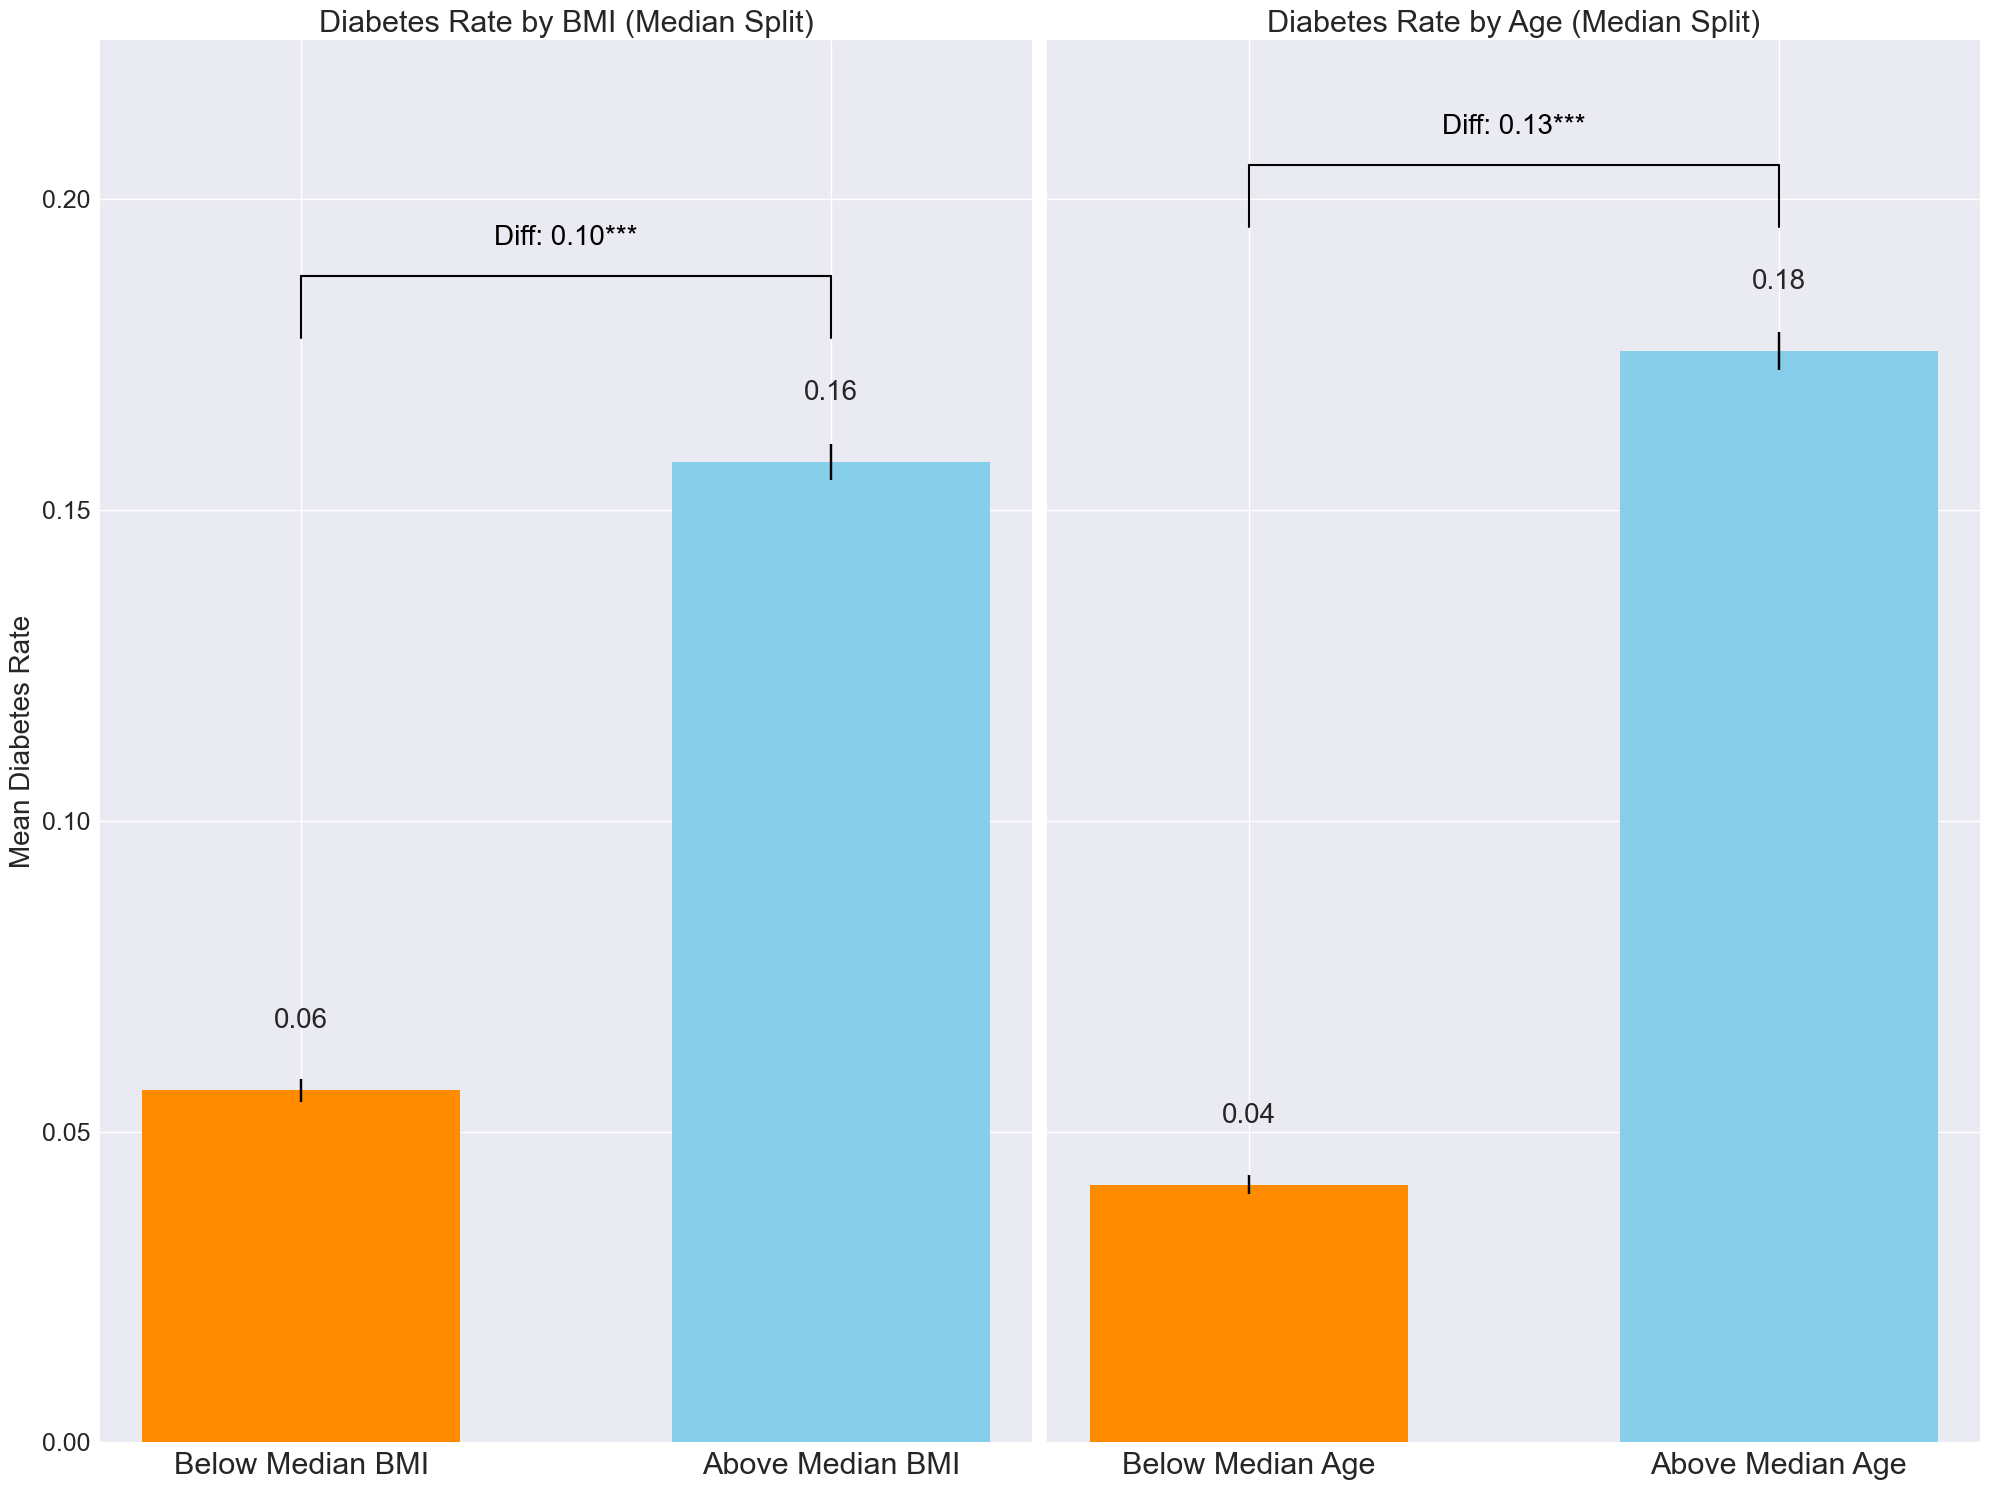

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Create median-based groups for BMI and Age
df['bmi_group'] = pd.cut(df['bmi'], bins=[-np.inf, df['bmi'].median(), np.inf], labels=["Below Median", "Above Median"])
df['age_group'] = pd.cut(df['age'], bins=[-np.inf, df['age'].median(), np.inf], labels=["Below Median", "Above Median"])

# List of median-based variables to test
median_vars = ['bmi_group', 'age_group']

# Set up figure size and positions
fig, axs = plt.subplots(1, len(median_vars), figsize=(20, 15))

# Find the global max to use the same Y-axis limit for all subplots
global_max = 0
for var in median_vars:
    group1 = df[df[var] == "Above Median"]['diabetes']  # Group where BMI/Age is above the median
    group2 = df[df[var] == "Below Median"]['diabetes']  # Group where BMI/Age is below the median
    
    # Calculate means
    mean_group1 = group1.mean()
    mean_group2 = group2.mean()
    
    # Update global max based on the highest mean value
    global_max = max(global_max, mean_group1, mean_group2)

# Add some padding to the Y-axis limit
y_max = global_max + 0.05

# Perform hypothesis testing and plot for each variable
for i, var in enumerate(median_vars):
    group1 = df[df[var] == "Above Median"]['diabetes']  # Group where BMI/Age is above the median
    group2 = df[df[var] == "Below Median"]['diabetes']  # Group where BMI/Age is below the median
    
    # Calculate means and standard errors
    mean_group1 = group1.mean()
    mean_group2 = group2.mean()
    std_err_group1 = stats.sem(group1)
    std_err_group2 = stats.sem(group2)
    
    # Calculate the number of observations in each group
    n1 = len(group1)
    n2 = len(group2)

    # Calculate the pooled proportion
    pooled_proportion = (group1.sum() + group2.sum()) / (n1 + n2)

    # Calculate the standard error for the difference in proportions
    standard_error = np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1/n1 + 1/n2))

    # Calculate the Z-statistic
    mean_difference = mean_group1 - mean_group2
    z_stat = mean_difference / standard_error

    # Calculate the two-tailed p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

    # Plot bars with error bars
    axs[i].bar(0, mean_group2, yerr=std_err_group2, color='darkorange', width=0.6, label=f'{var} = Below Median', align='center')
    axs[i].bar(1, mean_group1, yerr=std_err_group1, color='skyblue', width=0.6, label=f'{var} = Above Median', align='center')
    
    # Set x-ticks and labels
    axs[i].set_xticks([0, 1])

    # Set custom titles based on the variable
    if var == 'bmi_group':
        axs[i].set_title('Diabetes Rate by BMI (Median Split)', fontsize=22)
        axs[i].set_xticklabels(['Below Median BMI', 'Above Median BMI'], fontsize=22)
    elif var == 'age_group':
        axs[i].set_title('Diabetes Rate by Age (Median Split)', fontsize=22)
        axs[i].set_xticklabels(['Below Median Age', 'Above Median Age'], fontsize=22)
    
    # Only set the Y-axis label for the first subplot
    if i == 0:
        axs[i].set_ylabel('Mean Diabetes Rate', fontsize=20)
    else:
        axs[i].set_yticklabels([])  # Remove Y-axis tick labels for the second subplot
    
    # Set the same Y-axis limit for all subplots
    axs[i].set_ylim(0, y_max)
    
    # Increase Y-axis tick label size
    axs[i].tick_params(axis='y', labelsize=18)  # Increasing the Y-axis tick label size
    
    # Add significance marker if p-value is significant
    if p_value < 0.01:
        # Position the asterisk slightly above the highest bar
        max_bar = max(mean_group1, mean_group2)
        bar_height = max_bar + 0.03
        
        # Add the horizontal line with vertical bars
        axs[i].plot([0, 1], [bar_height, bar_height], color='black', lw=1.5)  # Horizontal line between bars
        axs[i].plot([0, 0], [bar_height - 0.01, bar_height], color='black', lw=1.5)  # Left vertical bar
        axs[i].plot([1, 1], [bar_height - 0.01, bar_height], color='black', lw=1.5)  # Right vertical bar
        
        # Add the asterisk and the mean difference
        axs[i].text(0.5, bar_height + 0.005, f'Diff: {mean_difference:.2f}***', ha='center', fontsize=20, color='black')
    
    # Annotate the means
    axs[i].text(0, mean_group2 + 0.01, f'{mean_group2:.2f}', ha='center', fontsize=20)
    axs[i].text(1, mean_group1 + 0.01, f'{mean_group1:.2f}', ha='center', fontsize=20)

# Adjust layout to prevent text overlap
plt.tight_layout()

# Save the figure
plt.savefig('C:/Users/Alexander/Documents/GitHub/berend-66-TDSOR_midterm_project_ABE/output/bmi_age_mean_test.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [108]:
# SMOKER AND SEX - MEAN TEST

In [109]:
import scipy.stats as stats
import statsmodels.stats.multitest as smm
import numpy as np

# List of variables to test
variables = ['hypertension', 'family_history_diabetes', 'smoker', 'sex']

# Collect p-values from each test
p_values = []

for var in variables:
    group1 = df[df[var] == 1]['diabetes']  # Group where X variable (e.g., hypertension) is 1
    group2 = df[df[var] == 0]['diabetes']  # Group where X variable is 0

    # Calculate the proportion of diabetes in each group
    p1 = group1.mean()  # Proportion for group 1
    p2 = group2.mean()  # Proportion for group 0

    # Sample sizes for each group
    n1 = len(group1)
    n2 = len(group2)

    # Calculate the pooled proportion
    pooled_p = (group1.sum() + group2.sum()) / (n1 + n2)

    # Calculate the standard error for the difference in proportions
    standard_error = np.sqrt(pooled_p * (1 - pooled_p) * (1/n1 + 1/n2))

    # Calculate the Z-statistic
    z_stat = (p1 - p2) / standard_error

    # Calculate the two-tailed p-value for the Z-test
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

    # Append p-value to the list
    p_values.append(p_value)

# Convert p-values to a numpy array
p_values = np.array(p_values)

# Apply Bonferroni Correction
alpha = 0.05  # Original significance level
bonferroni_corrected_alpha = alpha / len(p_values)  # Adjusted alpha
reject_bonferroni = p_values < bonferroni_corrected_alpha

# Apply Benjamini-Hochberg Correction
reject_bh, corrected_p_values_bh, _, _ = smm.multipletests(p_values, alpha=alpha, method='fdr_bh')

# Print the results
for i, var in enumerate(variables):
    print(f'\nVariable: {var}')
    print(f'Original p-value: {p_values[i]:.6f}')
    print(f'Bonferroni Corrected Significance: {reject_bonferroni[i]} (alpha = {bonferroni_corrected_alpha:.6f})')
    print(f'Benjamini-Hochberg Corrected Significance: {reject_bh[i]}, Corrected p-value: {corrected_p_values_bh[i]:.6f}')



Variable: hypertension
Original p-value: 0.000000
Bonferroni Corrected Significance: True (alpha = 0.012500)
Benjamini-Hochberg Corrected Significance: True, Corrected p-value: 0.000000

Variable: family_history_diabetes
Original p-value: 0.000000
Bonferroni Corrected Significance: True (alpha = 0.012500)
Benjamini-Hochberg Corrected Significance: True, Corrected p-value: 0.000000

Variable: smoker
Original p-value: 0.000000
Bonferroni Corrected Significance: True (alpha = 0.012500)
Benjamini-Hochberg Corrected Significance: True, Corrected p-value: 0.000000

Variable: sex
Original p-value: 0.001280
Bonferroni Corrected Significance: True (alpha = 0.012500)
Benjamini-Hochberg Corrected Significance: True, Corrected p-value: 0.001280


# Benjamini Hochberg Correction

In [110]:
# Step 2: Apply the Benjamini-Hochberg Procedure

def benjamini_hochberg(pvals, alpha=0.05):
    """
    Apply Benjamini-Hochberg correction to a list of p-values.
    Arguments:
        pvals: List or array of p-values.
        alpha: Desired FDR level (default = 0.05).
    Returns:
        A list of booleans indicating whether to reject each null hypothesis.
    """
    # Number of hypotheses
    m = len(pvals)
    
    # Sort p-values and keep track of original indices
    sorted_pvals = np.sort(pvals)
    original_indices = np.argsort(pvals)
    
    # Compute the Benjamini-Hochberg critical values
    critical_values = np.arange(1, m+1) / m * alpha
    
    # Determine the largest p-value where p <= critical_value
    rejected = np.zeros(m, dtype=bool)
    for i in range(m):
        if sorted_pvals[i] <= critical_values[i]:
            rejected[i] = True

    # Return the reject decisions in the original order
    return rejected[np.argsort(original_indices)]


# BH and Bonferroni Correction for SEX

Number of rejected null hypotheses: 509
Rejected indices: [  0   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  21  23
  26  27  28  29  30  33  34  36  37  38  39  41  42  43  46  48  49  51
  52  57  58  60  61  62  63  64  65  67  69  71  72  77  78  79  80  83
  84  85  86  89  90  91  94  96  98  99 100 105 106 108 110 112 113 114
 120 121 122 123 124 126 127 131 133 137 139 140 141 142 143 145 146 147
 149 151 153 154 156 158 159 162 163 165 166 168 169 170 177 181 182 183
 184 185 186 188 192 196 197 198 199 200 202 205 206 215 216 217 218 223
 226 227 228 229 230 235 238 239 242 243 244 246 248 249 250 251 254 256
 257 258 261 264 266 269 271 272 273 275 276 281 283 286 288 294 295 296
 297 298 301 302 304 305 311 313 317 319 322 323 324 327 330 337 340 341
 347 350 352 354 356 357 358 360 361 363 366 367 368 372 373 374 377 379
 380 381 382 384 386 389 390 391 394 395 400 402 403 404 405 406 407 408
 410 411 412 413 414 415 416 417 419 420 421 422 428 429 432 438 4

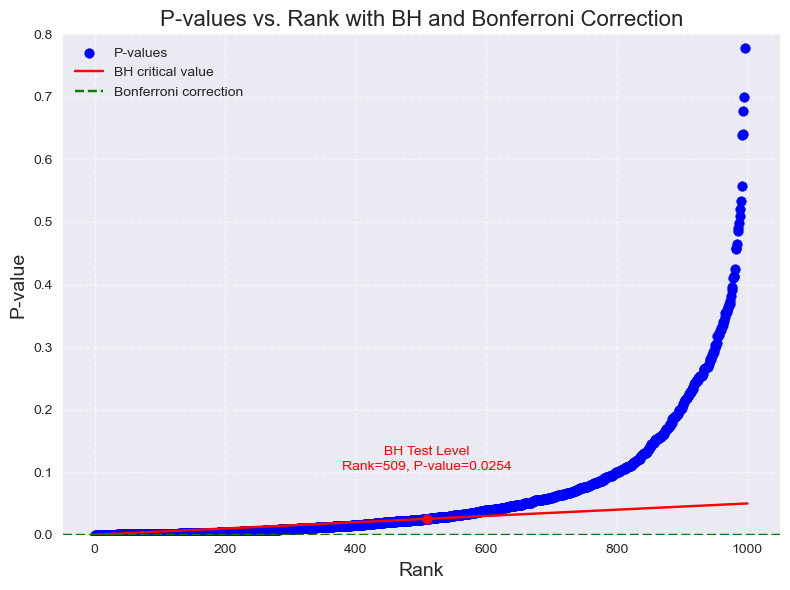

In [111]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Set the number of experiments
num_experiments = 1000

# List to store p-values
p_values = []

# Perform 1000 experiments by sampling 50% of the data
for i in range(num_experiments):
    # Randomly sample 50% of the original data
    df_sample = df.sample(frac=0.5, random_state=i)
    
    # Group where sex = 1 (e.g., male) and sex = 0 (e.g., female)
    group1 = df_sample[df_sample['sex'] == 1]['diabetes']  # Group for sex = 1
    group2 = df_sample[df_sample['sex'] == 0]['diabetes']  # Group for sex = 0

    # Calculate the proportion of diabetes in each group
    p1 = group1.mean()  # Mean represents the proportion for binary outcome
    p2 = group2.mean()
    
    # Calculate the number of observations in each group
    n1 = len(group1)
    n2 = len(group2)

    # Calculate the pooled proportion
    pooled_p = (group1.sum() + group2.sum()) / (n1 + n2)
    
    # Calculate the standard error for the difference in proportions
    standard_error = np.sqrt(pooled_p * (1 - pooled_p) * (1/n1 + 1/n2))
    
    # Calculate the z-statistic
    z_stat = (p1 - p2) / standard_error
    
    # Calculate the two-tailed p-value for the z-test
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    # Store the p-value
    p_values.append(p_value)

# Convert p-values to a numpy array
p_values = np.array(p_values)

# Benjamini-Hochberg correction
def benjamini_hochberg(p_vals, alpha=0.05):
    m = len(p_vals)
    sorted_indices = np.argsort(p_vals)
    sorted_p_vals = p_vals[sorted_indices]
    bh_threshold = np.arange(1, m+1) / m * alpha
    rejected = sorted_p_vals <= bh_threshold
    sorted_rejected_indices = sorted_indices[rejected]
    return np.in1d(np.arange(m), sorted_rejected_indices)

# Apply Benjamini-Hochberg procedure to the p-values
reject_null_hypotheses = benjamini_hochberg(p_values, alpha=0.05)

# Results
print(f"Number of rejected null hypotheses: {sum(reject_null_hypotheses)}")
print(f"Rejected indices: {np.where(reject_null_hypotheses)[0]}")

# Plotting the results
import matplotlib.pyplot as plt

# Sort p-values in ascending order
p_values = np.sort(p_values)
m = len(p_values)

# Benjamini-Hochberg critical values
alpha = 0.05
bh_critical_values = np.arange(1, m + 1) / m * alpha

# Bonferroni correction threshold
bonferroni_threshold = alpha / m

# Find the largest p-value that crosses the BH critical value
bh_test_level_index = np.where(p_values <= bh_critical_values)[0][-1]
bh_test_level_p_value = p_values[bh_test_level_index]
bh_test_level_rank = bh_test_level_index + 1  # Add 1 since the index is zero-based

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the p-values vs. rank
plt.scatter(np.arange(1, m + 1), p_values, color='blue', label='P-values')
plt.plot(np.arange(1, m + 1), bh_critical_values, color='red', linestyle='-', label='BH critical value')
plt.axhline(y=bonferroni_threshold, color='green', linestyle='--', label='Bonferroni correction')

# Highlight the p-value that crosses the BH test level
plt.scatter(bh_test_level_rank, bh_test_level_p_value, color='red', zorder=5)
plt.text(bh_test_level_rank, bh_test_level_p_value + 0.08,
         f'BH Test Level\nRank={bh_test_level_rank}, P-value={bh_test_level_p_value:.4f}',
         color='red', fontsize=10, ha='center')

# Set y-axis limit to a maximum of 1
plt.ylim(0, 0.8)

# Labels and title
plt.title('P-values vs. Rank with BH and Bonferroni Correction', fontsize=16)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('P-value', fontsize=14)

# Add the legend
plt.legend()

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.savefig('C:/Users/Alexander/Documents/GitHub/berend-66-TDSOR_midterm_project_ABE/output/bh_sex.png', dpi=300, bbox_inches='tight')

plt.show()


# BH and Bonferroni Correction for all vars

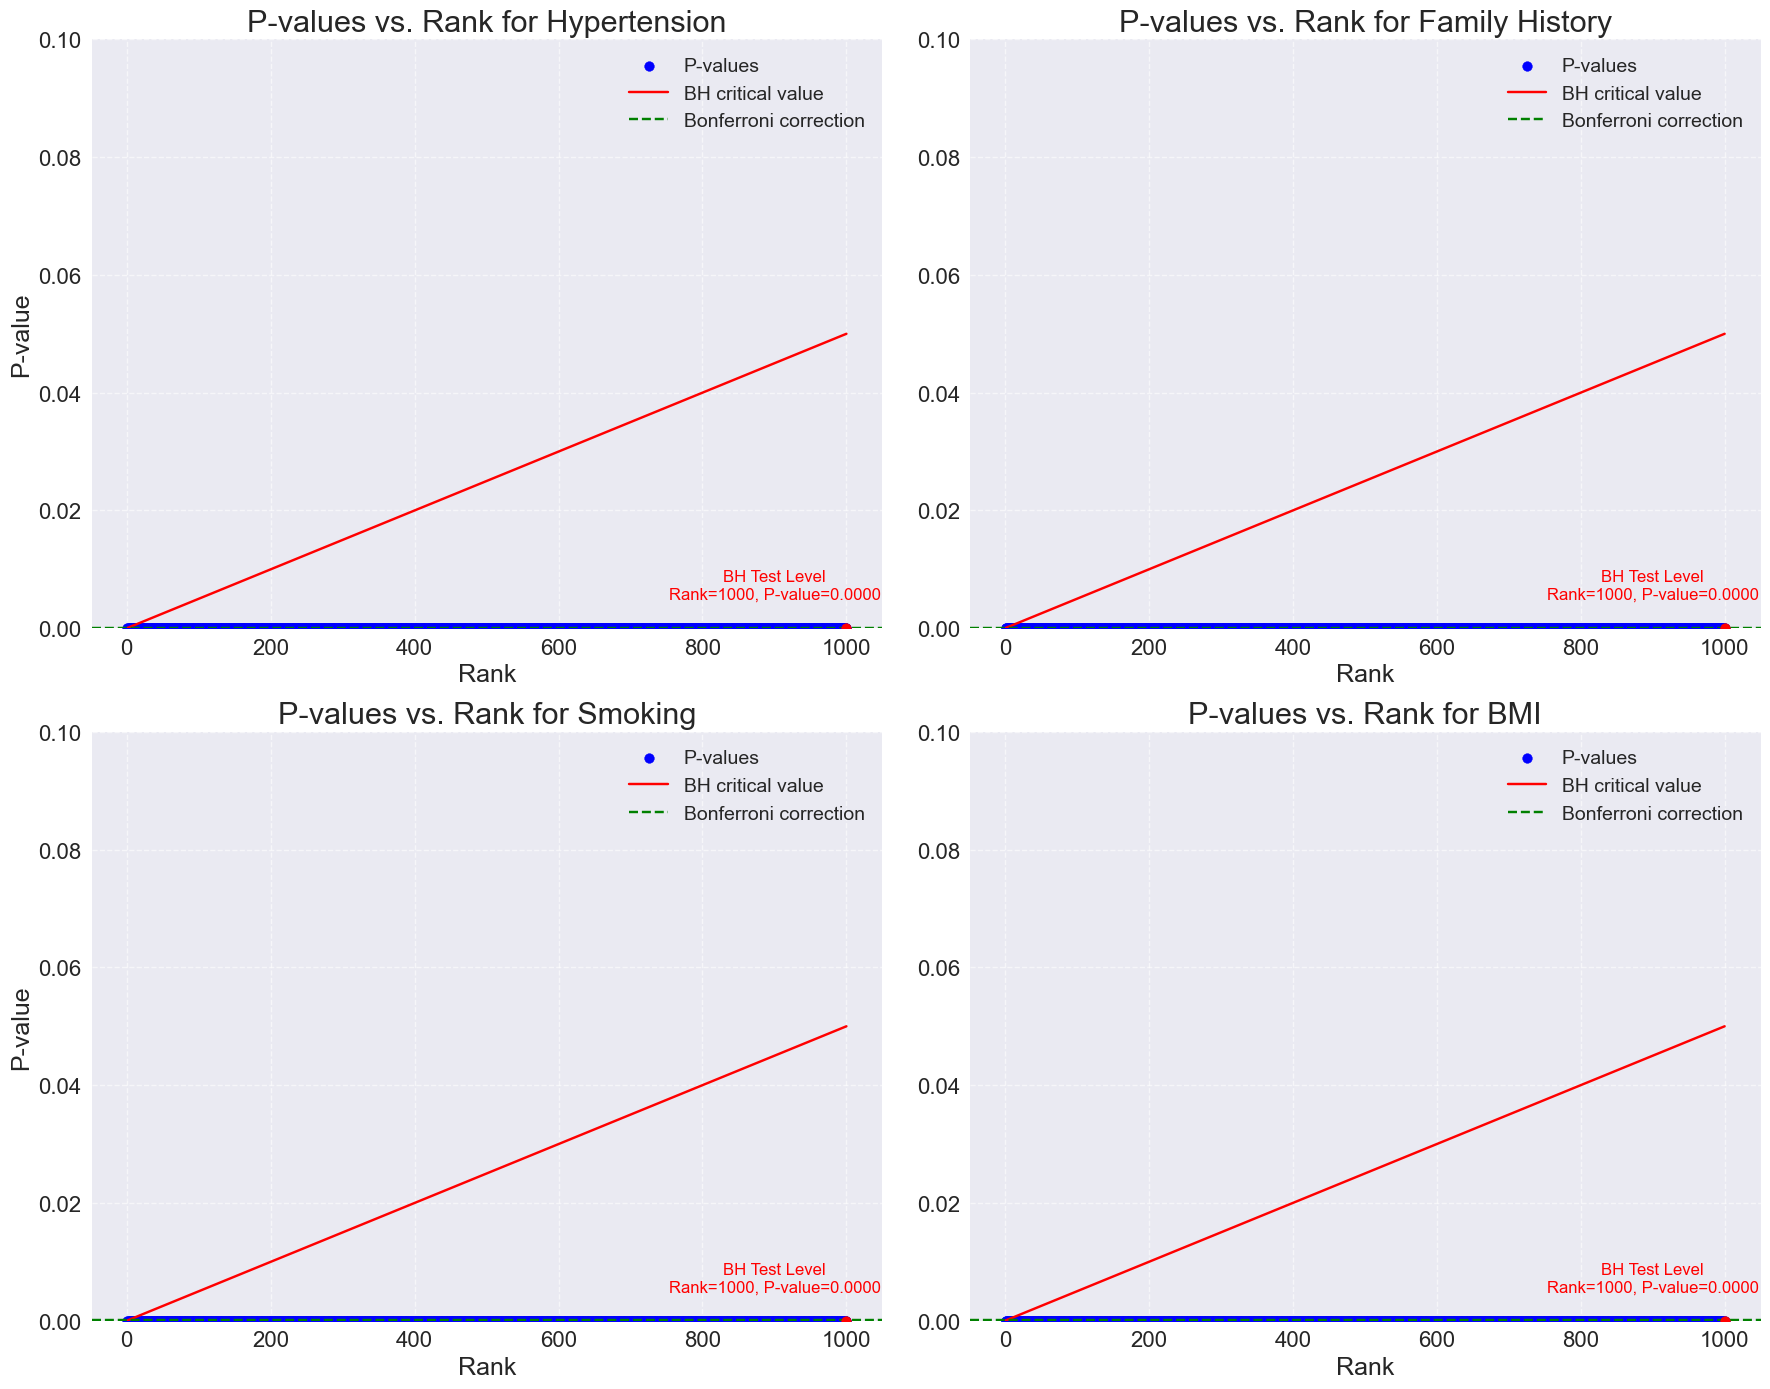

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Assuming you have four different datasets for variables (replace with your actual data)
datasets = [df[df['hypertension'] == val]['diabetes'] for val in [1, 0]], \
           [df[df['family_history_diabetes'] == val]['diabetes'] for val in [1, 0]], \
           [df[df['smoker'] == val]['diabetes'] for val in [1, 0]], \
           [df[df['bmi'] > df['bmi'].median()]['diabetes'], df[df['bmi'] <= df['bmi'].median()]['diabetes']]
titles = ['Hypertension', 'Family History', 'Smoking', 'BMI']

# Parameters for the hypothesis tests
num_experiments = 1000
alpha = 0.05

# Perform Z-test and calculate p-values for each variable in multiple experiments
p_values_list = []
for group1, group2 in datasets:
    p_values = []
    for _ in range(num_experiments):
        df_sample1 = group1.sample(frac=0.5, random_state=np.random.randint(1, 10000))
        df_sample2 = group2.sample(frac=0.5, random_state=np.random.randint(1, 10000))
        
        p1, p2 = df_sample1.mean(), df_sample2.mean()
        n1, n2 = len(df_sample1), len(df_sample2)
        pooled_p = (df_sample1.sum() + df_sample2.sum()) / (n1 + n2)
        
        standard_error = np.sqrt(pooled_p * (1 - pooled_p) * (1/n1 + 1/n2))
        z_stat = (p1 - p2) / standard_error
        p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
        
        p_values.append(p_value)
    p_values_list.append(np.array(p_values))

# Create 2x2 plot for each set of p-values
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
for i, ax in enumerate(axs.flat):
    p_values = np.sort(p_values_list[i])
    m = len(p_values)
    
    # Benjamini-Hochberg critical values and Bonferroni correction
    bh_critical_values = np.arange(1, m + 1) / m * alpha
    bonferroni_threshold = alpha / m
    
    # Find the largest p-value that crosses the BH critical value
    bh_test_level_index = np.where(p_values <= bh_critical_values)[0][-1]
    bh_test_level_p_value = p_values[bh_test_level_index]
    bh_test_level_rank = bh_test_level_index + 1  # Add 1 since index is zero-based

    # Plot p-values vs rank
    ax.scatter(np.arange(1, m + 1), p_values, color='blue', label='P-values')
    ax.plot(np.arange(1, m + 1), bh_critical_values, color='red', linestyle='-', label='BH critical value')
    ax.axhline(y=bonferroni_threshold, color='green', linestyle='--', label='Bonferroni correction')

    # Highlight the BH test level point
    ax.scatter(bh_test_level_rank, bh_test_level_p_value, color='red', zorder=5)
    ax.text(bh_test_level_rank - 100, bh_test_level_p_value + 0.005,
            f'BH Test Level\nRank={bh_test_level_rank}, P-value={bh_test_level_p_value:.4f}',
            color='red', fontsize=12, ha='center')

    # Set y-axis limit to a maximum of 0.1
    ax.set_ylim(0, 0.1)

    # Labels and title
    ax.set_title(f'P-values vs. Rank for {titles[i]}', fontsize=22)
    ax.set_xlabel('Rank', fontsize=18)
    if i % 2 == 0:  # Show y-label only for the first column plots
        ax.set_ylabel('P-value', fontsize=18)
    
    # Set the tick label sizes for both X and Y axes
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
    # Add legend and grid
    ax.legend(fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('C:/Users/Alexander/Documents/GitHub/berend-66-TDSOR_midterm_project_ABE/output/all_bh_plots_z_test.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
